
Use LSTM, Bi-LSTM networks for speech recognition. Use STFT / STCT, MFCC & LPC coefficients.

The source file is named "harvard.mp3"

Write a code for it 

In [17]:
import numpy as np
import librosa
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense
from sklearn.model_selection import train_test_split

# Load the audio file
y, sr = librosa.load('Bhanumati Weds Rajat.mp3', sr=None)

# Extract MFCC features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Extract STFT features
stft = np.abs(librosa.stft(y))

# Extract LPC features
lpc_order = 13  # Assuming 13 as the order of LPC coefficients
lpc = librosa.lpc(y, order=lpc_order)

# Reduce dimensions of LPC features
lpc = np.squeeze(lpc)

# Average MFCC and STFT features along time axis
mfcc_avg = np.mean(mfcc, axis=1)
stft_avg = np.mean(stft, axis=1)

# Concatenate features
features = np.concatenate((mfcc_avg, stft_avg, lpc), axis=0)

# Duplicate the single sample to create a dataset with more than one sample
X = np.repeat(np.expand_dims(features, axis=0), 10, axis=0)
y = np.ones(10)  # Create a target variable with 10 samples

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a time step dimension to X_train and X_test
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile and train LSTM model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Define Bi-LSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(128), input_shape=(X_train.shape[1], X_train.shape[2])))
model_bilstm.add(Dense(1, activation='sigmoid'))

# Compile and train Bi-LSTM model
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\harih\AppData\Local\Temp\ipykernel_3904\1767161077.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('Bhanumati Weds Rajat.mp3', sr=None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 1.5274 - val_accuracy: 0.0000e+00 - val_loss: 1.5112
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.5112 - val_accuracy: 0.0000e+00 - val_loss: 1.4950
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 1.4950 - val_accuracy: 0.0000e+00 - val_loss: 1.4789
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 1.4789 - val_accuracy: 0.0000e+00 - val_loss: 1.4629
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.4629 - val_accuracy: 0.0000e+00 - val_loss: 1.4470
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.4470 - val_accuracy: 0.0000e+00 - val_loss: 1.4311
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.4311 - val_accuracy: 0.0000e+00 - val_loss: 1.4154
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 1.

C:\Users\harih\AppData\Local\Temp\ipykernel_3128\2267277198.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('Bharat.mp3', sr=None)
c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


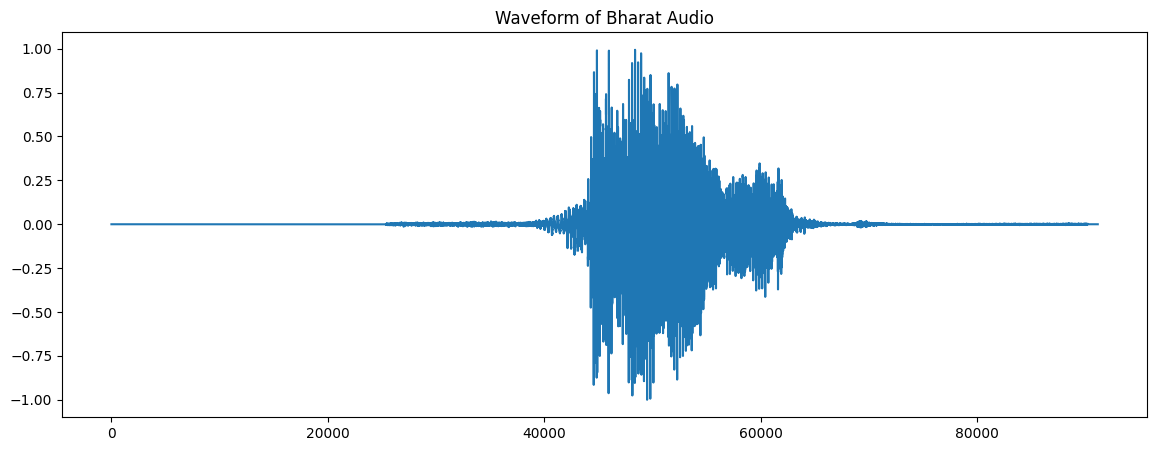

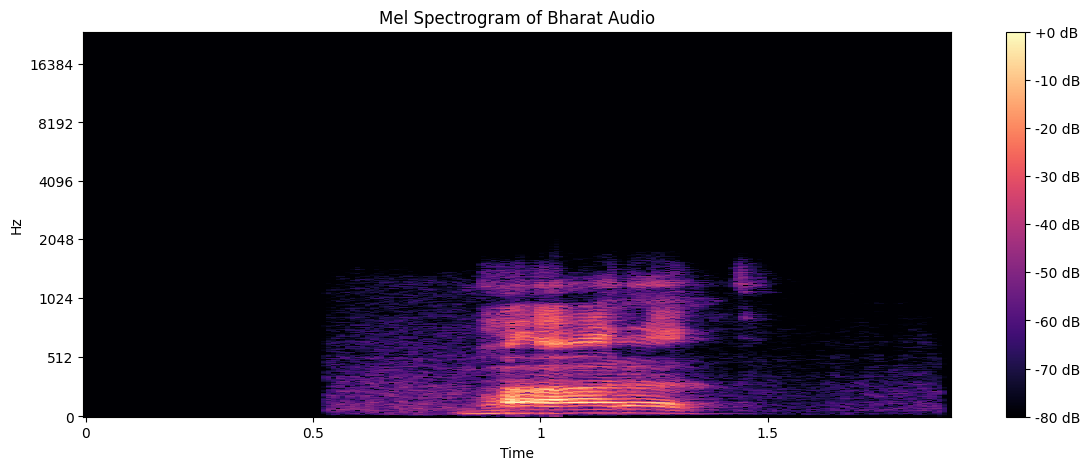

In [5]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
y, sr = librosa.load('Bharat.mp3', sr=None)
y_trim, index = librosa.effects.trim(y)
sf.write('trimmed_audio.wav', y_trim, sr)

# Plot waveform of original audio
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform of Bharat Audio')
plt.show()

# Plot melspectrogram of original audio
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of Bharat Audio')
plt.colorbar(format='%+2.0f dB')
plt.show()


C:\Users\harih\AppData\Local\Temp\ipykernel_3128\913951270.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('Bhanumati Weds Rajat.mp3', sr=None)


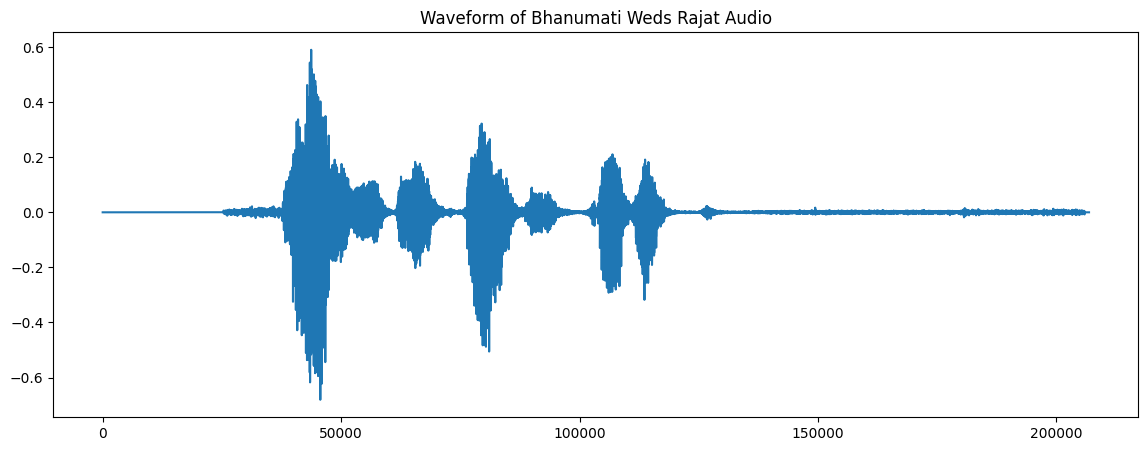

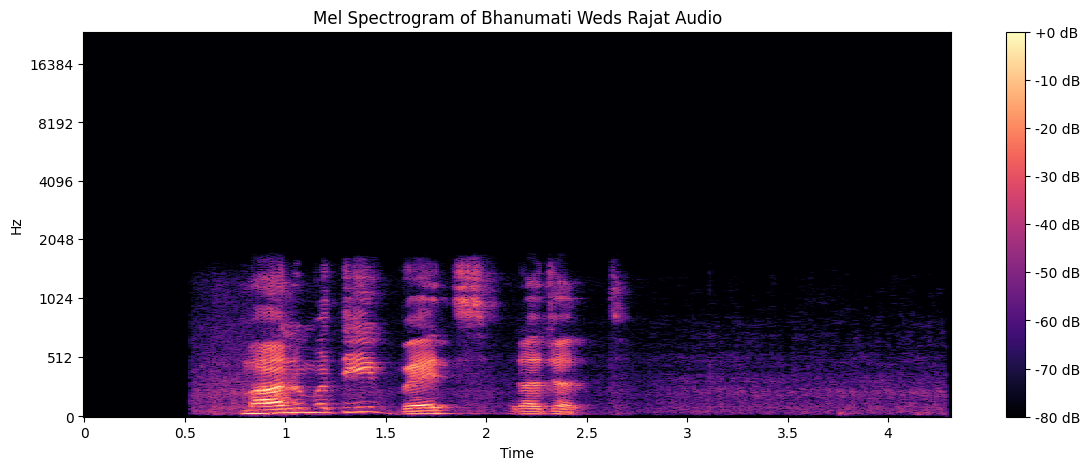

In [7]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
y, sr = librosa.load('Bhanumati Weds Rajat.mp3', sr=None)
y_trim, index = librosa.effects.trim(y)
sf.write('trimmed_audio.wav', y_trim, sr)

# Plot waveform of original audio
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform of Bhanumati Weds Rajat Audio')
plt.show()

# Plot melspectrogram of original audio
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of Bhanumati Weds Rajat Audio')
plt.colorbar(format='%+2.0f dB')
plt.show()
